Lets build a harmonic oscillator without solving the differential equation. This is a classic example of how a computer can help you to solve problems

In [1]:
# Include the usuals
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math as math

In [3]:
# Lets define the spring with a default spring coefficient of 0.1
def force(x, k=0.1):
    return -x*k

Now we can numerically solve the differential equation using code. We do this by solving the equations of motion. Our differential equation for the spring is $m\frac{d^{2}x}{dt^2}= -kx$. Since this is a second order differential equation, we will need two initial conditions (e.g. initial position and derivative) and need to keep track of both $x(t)$ and $v(t) = dx(t) / dt$ to solve it.

From the taylor series for the position and velocity we can write
\begin{align}
x(t + \delta t) &= x(t) + v(t)(\delta t) - \frac{1}{2} (k/m) x(t) (\delta t)^2 + \dots \\
v(t + \delta t) &= v(t) - (k/m) x(t)(\delta t) + \dots
\end{align}
For small enough $\delta t$, these leading terms are already a good approximation. So we can approximately solve for the function by taking small timesteps $x(0) \rightarrow x(\delta t) \rightarrow x(2 \delta t) \dots$ and $v(0) \rightarrow v(\delta t) \rightarrow v(2 \delta t) \dots$ using the equation above to the order shown. Either making $\delta t$ smaller or including more terms in the Taylor series makes our approximate solution better and better.

In [50]:
# Solve using a reasonably small dt:
ts = []
xs = []
dt = 0.01
m = 1.0
x_old = 1
v_old = 0
for i0 in range(10000):
    t = i0*dt
    dv_dt = force(x_old) / m
    v = v_old + dt*dv_dt
    x = x_old + dt*v_old + 0.5*dt*dt*dv_dt
    ts.append(t)
    xs.append(x)
    x_old, v_old = x, v
    
# For comparison, things don't look as good with larger dt:
ts2 = []
xs2 = []
dt = 0.1
m = 1.0
x_old = 1
v_old = 0
for i0 in range(1000):
    t = i0*dt
    dv_dt = force(x_old) / m
    v = v_old + dt*dv_dt
    x = x_old + dt*v_old + 0.5*dt*dt*dv_dt
    ts2.append(t)
    xs2.append(x)
    x_old, v_old = x, v

<IPython.core.display.Javascript object>


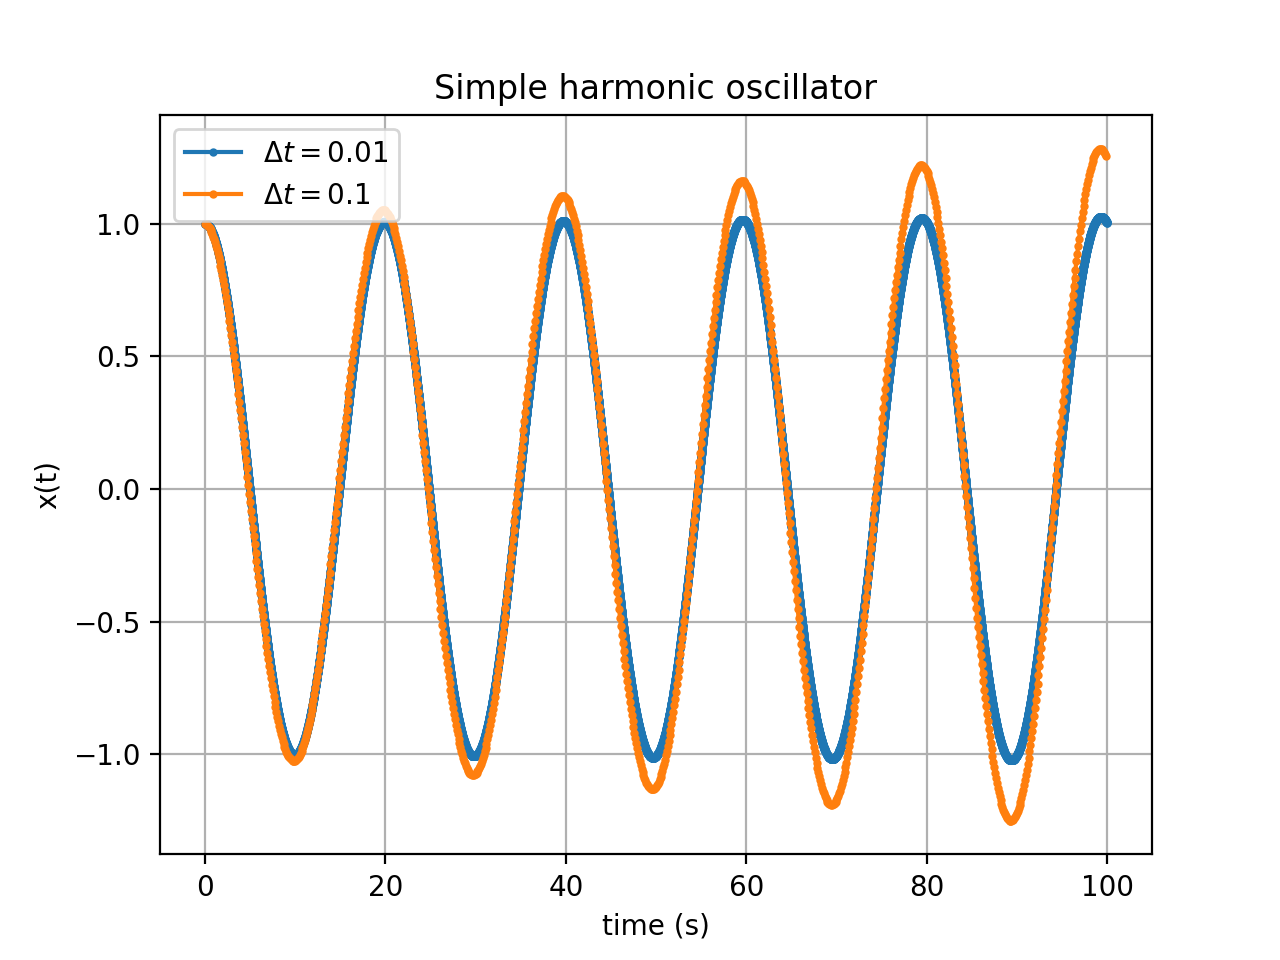

In [51]:
fig, ax = plt.subplots()
ax.plot(ts, xs, label='$\Delta t=0.01$', marker='.', markersize=4)
ax.plot(ts2, xs2, label='$\Delta t=0.1$', marker='.', markersize=4)
ax.set(xlabel='time (s)', ylabel='x(t)', title='Simple harmonic oscillator')
ax.grid()
plt.legend()
plt.show()

Now what if we modify our force so that its not a haromnic oscillator.  

<IPython.core.display.Javascript object>


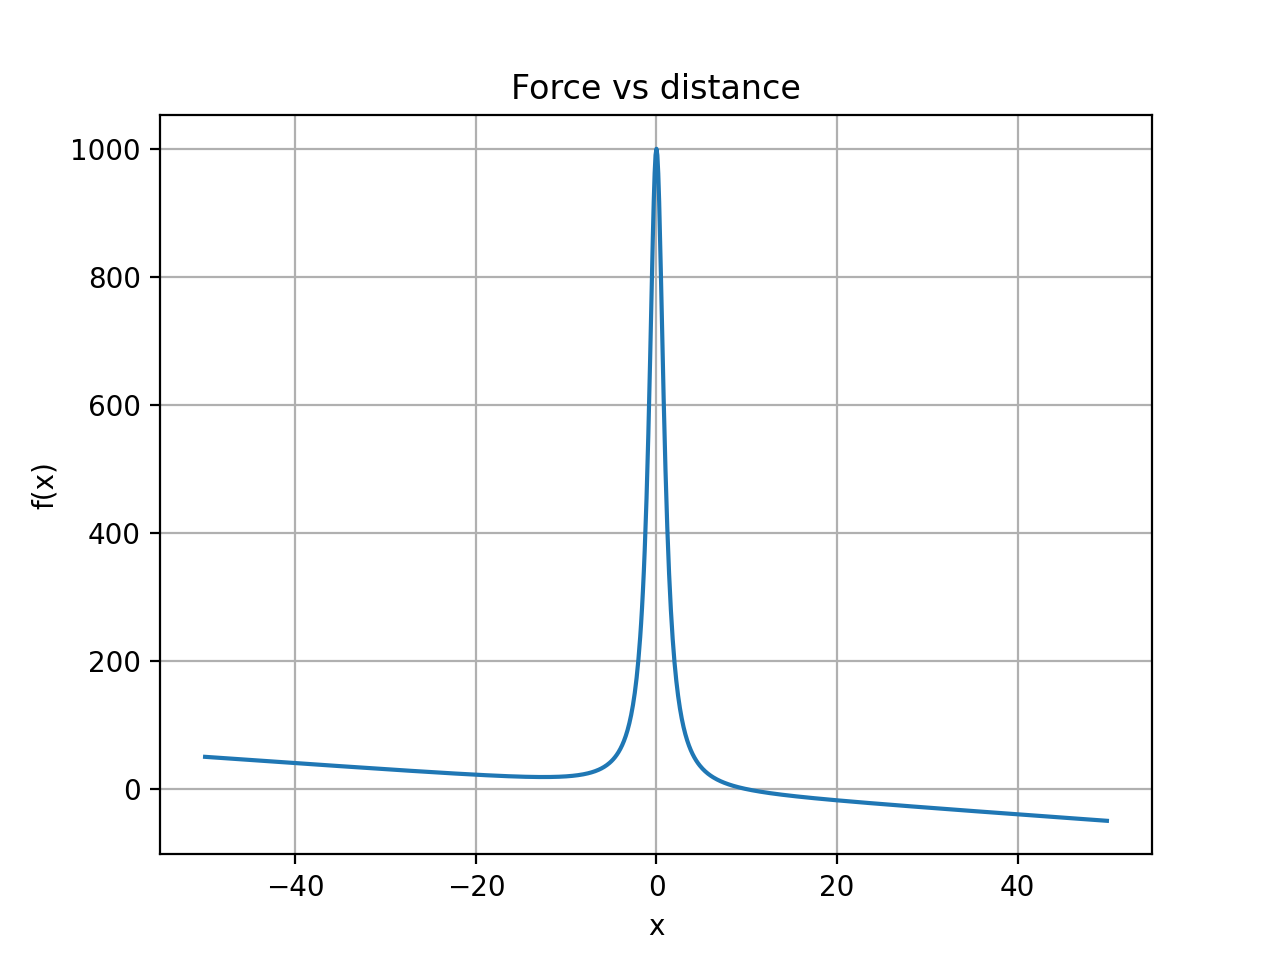

In [48]:
def force_mod(x, k=1, k1=1000):
        return -k*x + k1/(x*x+1)

# Plot the force vs position x
xs = []
fs = []
for i0 in range(1000):
    x = i0*0.1 - 500*0.1
    f = force_mod(x)
    xs.append(x)
    fs.append(f)

fig, ax = plt.subplots()
ax.plot(xs, fs)
ax.set(xlabel='x', ylabel='f(x)', title='Force vs distance')
ax.grid()
plt.show()

Even though solving the differential equation for the position would be pretty hard, we can easily solve numerically to see what happens.

<IPython.core.display.Javascript object>


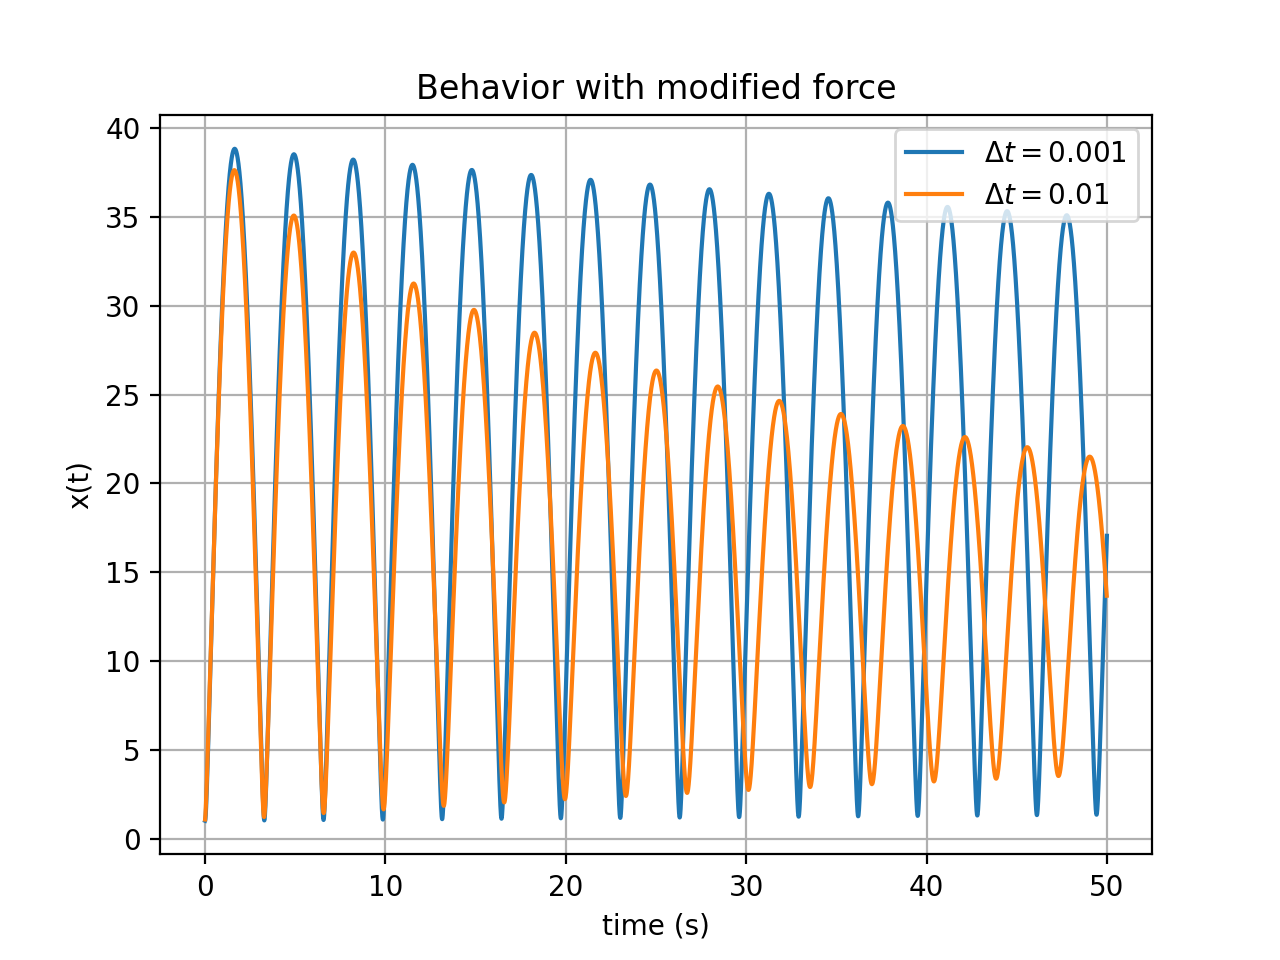

In [52]:
# to avoid rewriting the loops, we define the common steps as a function
def solve_mod(dt, N, x0, v0, m):
    ts = []
    xs = []
    x = x0
    v = v0
    for i0 in range(N):
        t = i0*dt
        dv_dt = force_mod(x) / m
        v = v + dt*dv_dt
        x = x + dt*v + 0.5*dt*dt*dv_dt # up to 2nd order
        ts.append(t)
        xs.append(x)
    # return a pair (can assign to a pair of variables, see below)
    return ts, xs

# Solve using a reasonably small dt
ts1, xs1 = solve_mod(dt=0.001, N=50000, x0=1, v0=0, m=1.0)
    
# For comparison, things don't look as good with larger dt
ts2, xs2 = solve_mod(dt=0.01, N=5000, x0=1, v0=0, m=1.0)
    

fig, ax = plt.subplots()
ax.plot(ts1, xs1, label='$\Delta t=0.001$')
ax.plot(ts2, xs2, label='$\Delta t=0.01$')
ax.set(xlabel='time (s)', ylabel='x(t)', title='Behavior with modified force')
ax.grid()
plt.legend()
plt.show()